https://thecleverprogrammer.com/2021/03/03/spotify-recommendation-system-with-machine-learning/ used as a guide for what kind of pre-processing we should do. The rest comes from our knowledge from CPSC 330

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from joblib import dump
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

data = pd.read_csv("spotify.csv")

# Save the song names to a csv we can use in Flask to determine the names of recommended songs 
# based on the results from the Kmeans and NearestNeighbors models
# IMPORTANT: DO NOT CHANGE THE ORDER OF THE DATASET OTHERWISE THE INDICES USED TO RETRIEVE SONG IDs WILL RETURN THE WRONG ONES
song_ids = data['id']
song_ids.to_csv('song_ids.csv', index=False)

In [2]:
# data.head()

Select the relevant columns. We're choosing to do a more numerical analysis based on song features that can be measured in tempo, etc to determine which songs are similar. Year is also included since songs of a certain period tend to be more similar.

Also pre-process the numerical columns such that they are scaled between 0 to 1, so that no individual feature 'over-powers' the other features with a difference in magnitude of scale.

In [3]:
selected_columns = ['acousticness', 'danceability', 'energy', 
                    'instrumentalness', 'liveness', 'loudness', 
                    'speechiness', 'tempo', 'valence', 'popularity', 'year']
data = data[selected_columns]

# Scale the data and save it so the scaled dataset can be used in Flask
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=selected_columns) # Make df to fix Flask warning about training without labels
data_scaled.to_csv('data_scaled.csv', index=False)

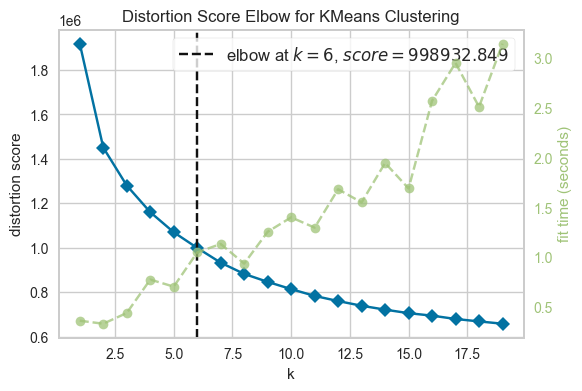

In [4]:
# cpsc330 lecture material were used as a guide for optimization of kmeans
# optimize k using elbow method
kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1, 20), size=(600, 400))

visualizer.fit(data_scaled) 
visualizer.show();

Elbow is at k = 6, thus 6 would be the number of clusters for this dataset

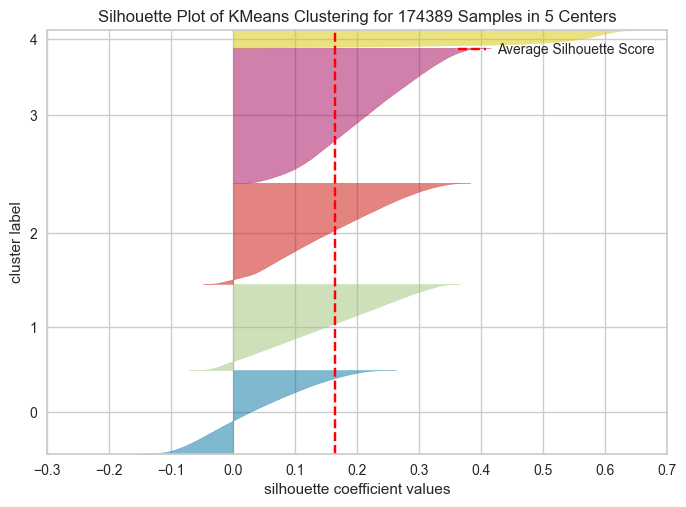

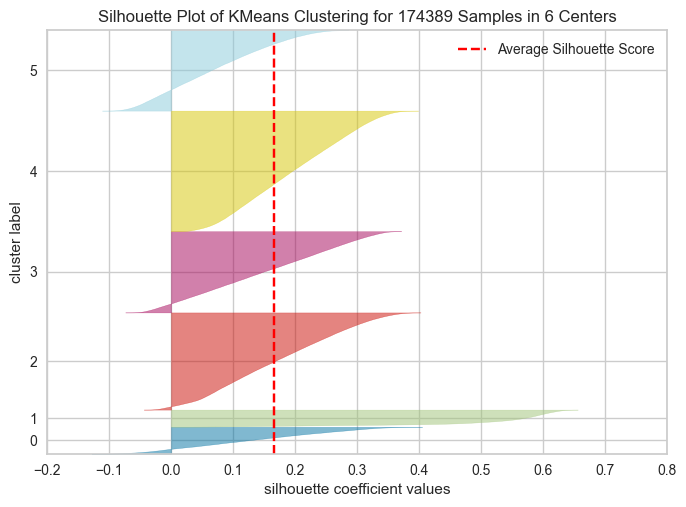

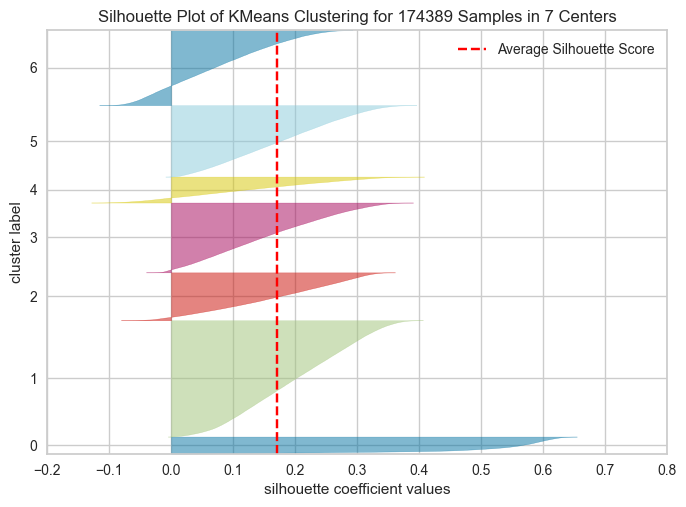

In [5]:
for k in range(5, 8):
    model = KMeans(k, random_state=123, n_init=10)
    visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
    visualizer.fit(data_scaled)
    visualizer.show()

With the silhouette plots, we see that the coefficients are relatively similar and thus, we continue with k=6 from the elbow plot.
A KMeans model clusters the training set into the number of clusters specified. It also assumes clusters are spherical. DBScan could be an alternative but tuning the parameters properly could be difficult, resulting in worse predictions. KMeans also scales better to larger datasets. 

In [6]:
k = 6
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(data_scaled)

KMeans(n_clusters=6, n_init=10)

In [7]:
num_recommended_songs = 5
nn = NearestNeighbors(n_neighbors=num_recommended_songs)
nn.fit(data_scaled)

NearestNeighbors()

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
Saving to joblib for use in Flask without needing to re-train the entire model on start-up

In [8]:
dump(scaler, 'scaler.joblib')
dump(kmeans, 'kmeans.joblib')
dump(nn, 'nearest_neighbors.joblib')

['nearest_neighbors.joblib']